I began my project by importing the numpy and matplotlib libraries.

In [79]:
#Import Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I read in the supplied data file of SAT scores, and my extra supplementary data.

I then put both sets of data into a single numpy array, being sure to separate the header from the actual data.

In [13]:
#Open csv file and put it into an array; remove \n
data=data2=[]
add=add2=ind=[]
with open("/Users/thomas/GA-DSI/projects/projects-weekly/project-01/assets/sat_scores.csv",'rU') as f:
    data=[line.rstrip('\n').replace('\"','') for line in f]
for x in data:
    data2.append(x.split(','))
ind1=np.array(data2[0])
d1=np.array(data2[1:])
with open("/Users/thomas/GA-DSI/projects/projects-weekly/project-01/assets/untitled.csv",'rU') as f:
    add=[line.rstrip('\n').replace('\"','') for line in f]
for x in add:
    add2.append(x.split('\t'))
ind2=np.array(add2[0][1:])
d2=np.array([x[1:] for x in add2[1:]])
ind=np.hstack((ind1,ind2))
d=np.hstack((d1,d2))
ind=ind.reshape(len(ind),1)
d=d.T

Although all the data was in its own array, I found it beneficial to further seperate the data into seperate numpy arrays to ensure the int and float data types were not strings.

I named these new arrays after the appropriate header, while also removing the last row of data, which was titled all, but did not seem to have any significance in my analysis (especially as I would compute this data later).

I found the mean and standard deviation for each of these unique arrays, and then printed them out to help describe the data to the user.

In [23]:
#d is the data matrix; ind is the index matrix
#Break up 'ind' into arrays
state=d[0][:-1]
rate=d[1][:-1].astype(int)
verbal=d[2][:-1].astype(int)
math=d[3][:-1].astype(int)
population=d[4][:-1].astype(int)
region=d[5][:-1]
avg_income=d[6][:-1].astype(int)
dens_sqmi=d[7][:-1].astype(float)
pop_urb=d[8][:-1].astype(float)
tot=[(x+y)/2 for x,y in zip(verbal,math)]

r_mean=np.mean(rate)
r_std=np.std(rate)
v_mean=np.mean(verbal)
v_std=np.std(verbal)
m_mean=np.mean(math)
m_std=np.std(math)
p_mean=np.mean(population)
p_std=np.std(population)
a_mean=np.mean(avg_income)
a_std=np.std(avg_income)
d_mean=np.mean(dens_sqmi)
d_std=np.std(dens_sqmi)
u_mean=np.mean(pop_urb)
u_std=np.std(pop_urb)

data_dict={}
data_dict[ind[0][0]]=state
data_dict[ind[1][0]]=rate
data_dict[ind[2][0]]=verbal
data_dict[ind[3][0]]=math
data_dict[ind[4][0]]=population
data_dict[ind[5][0]]=region
data_dict[ind[6][0]]=avg_income
data_dict[ind[7][0]]=dens_sqmi
data_dict[ind[8][0]]=pop_urb


print "Header:     ","         Mean", "Standard Deviation"
print "Rate:       ","        ",r_mean,r_std
print "Verbal:     ",v_mean,v_std
print "Math:       ",m_mean,m_std
print "Population: ",p_mean,p_std
print "Avg Income: ",a_mean,a_std
print "Dens/Sqmi:  ",d_mean,d_std
print "% Pop Urb:  ",u_mean,u_std

Header:               Mean Standard Deviation
Rate:                 37.0 27.2792386761
Verbal:      532.529411765 33.0319826842
Math:        531.843137255 35.9298731731
Population:  6237090.41176 7057993.10395
Avg Income:  51252.9215686 8813.21518381
Dens/Sqmi:   401.658823529 1463.68640274
% Pop Urb:   74.1078431373 14.7388221938


I then regrouped some of the unique arrays by region for a more robust presentation and analysis of my findings.

I also chose to use only the pop_urb data from the supplementary data.

In [33]:
#x_1-->Average Score
#x_2-->Participation Rate
#x_3-->Math
#x_4-->Verbal
#x_5-->People who took test per state
#x_6-->Pop Urban

z=[(x,y) for x,y in zip(state,dens_sqmi)]
ne_1=[x for x,y,z in zip(tot,region,rate) if y=='NE']
ne_2=[z for x,y,z in zip(tot,region,rate) if y=='NE']
ne_3=[x for x,y,z in zip(math,region,verbal) if y=='NE']
ne_4=[z for x,y,z in zip(math,region,verbal) if y=='NE']
ne_5=[x*z for x,y,z in zip(population,region,rate) if y=='NE']
ne_6=[x for x,y,z in zip(pop_urb,region,verbal) if y=='NE']
ne_sum=sum(ne_5)
ne_mean1=np.mean(ne_2)
ne_mean2=np.mean(ne_1)
s_1 =[x for x,y,z in zip(tot,region,rate) if y=='S']
s_2 =[z for x,y,z in zip(tot,region,rate) if y=='S']
s_3 =[x for x,y,z in zip(math,region,verbal) if y=='S']
s_4 =[z for x,y,z in zip(math,region,verbal) if y=='S']
s_5 =[x*z for x,y,z in zip(population,region,rate) if y=='S']
s_6 =[x for x,y,z in zip(pop_urb,region,verbal) if y=='S']
s_sum=sum(s_5)
s_mean1=np.mean(s_2)
s_mean2=np.mean(s_1)
mw_1=[x for x,y,z in zip(tot,region,rate) if y=='MW']
mw_2=[z for x,y,z in zip(tot,region,rate) if y=='MW']
mw_3=[x for x,y,z in zip(math,region,verbal) if y=='MW']
mw_4=[z for x,y,z in zip(math,region,verbal) if y=='MW']
mw_5=[x*z for x,y,z in zip(population,region,rate) if y=='MW']
mw_6=[x for x,y,z in zip(pop_urb,region,verbal) if y=='MW']
mw_sum=sum(mw_5)
mw_mean1=np.mean(mw_2)
mw_mean2=np.mean(mw_1)
w_1 =[x for x,y,z in zip(tot,region,rate) if y=='W']
w_2 =[z for x,y,z in zip(tot,region,rate) if y=='W']
w_3 =[x for x,y,z in zip(math,region,verbal) if y=='W']
w_4 =[z for x,y,z in zip(math,region,verbal) if y=='W']
w_5 =[x*z for x,y,z in zip(population,region,rate) if y=='W']
w_6 =[x for x,y,z in zip(pop_urb,region,verbal) if y=='W']
w_sum=sum(w_5)
w_mean1=np.mean(w_2)
w_mean2=np.mean(w_1)
t=ne_sum+s_sum+mw_sum+w_sum

This plot is a box plot, showing a unique view of the distribution of scores. It does not indicate anything significant. Everthing looks fairly gaussian, and a little skewed.

The Math scores have a smaller 25% to 75% range, but a larger overall range, indicating there may be some outliers. 
The scores, however, seem fairly similar.

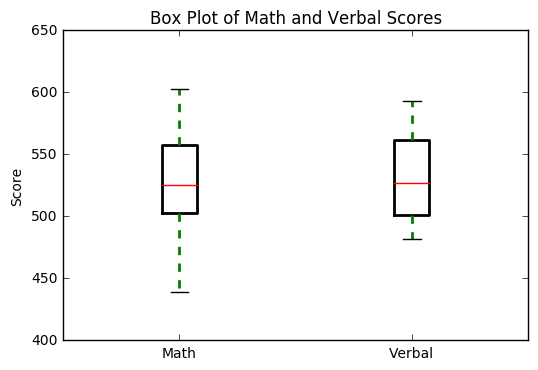

In [56]:
bp=plt.boxplot([math,verbal])
plt.setp(bp['boxes'], color='black',linewidth=2)
plt.setp(bp['whiskers'], color='green',linewidth=2)
plt.setp(bp['fliers'], color='red', marker='+')
plt.xticks([1,2],["Math","Verbal"])
plt.ylabel("Score")
plt.title("Box Plot of Math and Verbal Scores")
plt.show()

This chart is a histogram. It indicates the distribution of scores by discretely comparing each value. 

The histogram indicates an outlier for the math scores, and no outliers for the verbal scores.
The histogram looks to be skewed, if it is indeed Gaussian.
However, it would be unfair to assess the distribution as being skewed or Gaussian due to the widely varying participation rates, which have significant affect on the scores, as will be later demonstrated.

This chart may seem useful, but the reality is the data is too uncomparable in a cumulative format.

Any histogram made by region would also be fairly useless due to the lack of data points available. 

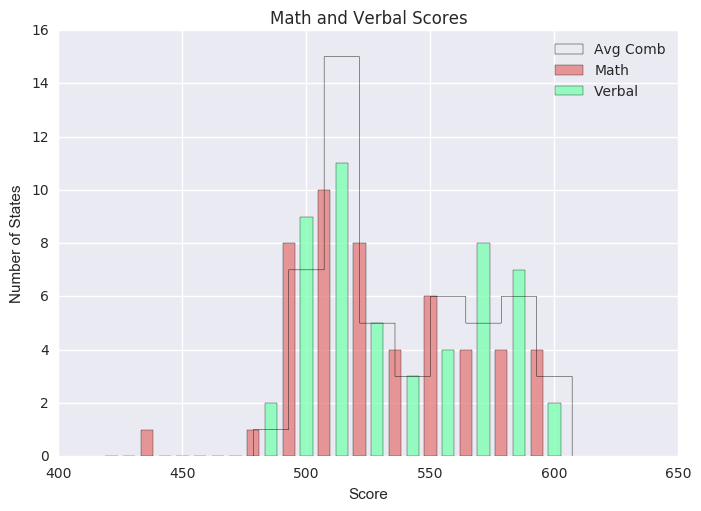

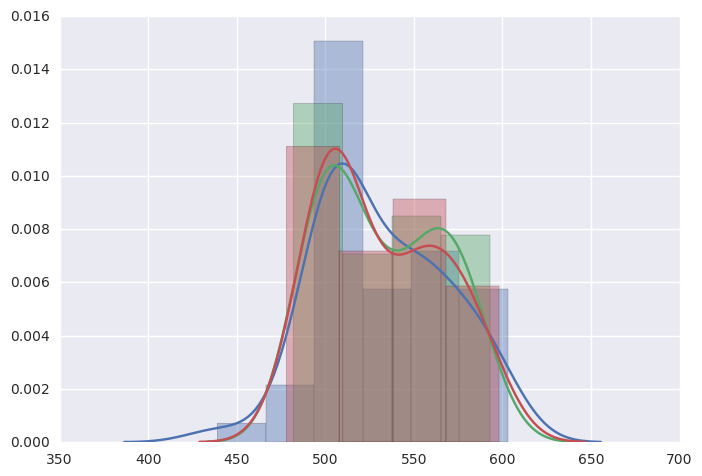

In [87]:
#Histogram
plt.hist(math,np.linspace(400,600,15),alpha=0.8,rwidth=0.35,color=(0.9,0.5,.5,0))
plt.hist(verbal,np.linspace(400,600,15),alpha=0.8,rwidth=0.35,align='right',color=(0.5,1,0.7,0))
plt.hist(tot,np.linspace(400,600,15),alpha=1,align='right',color=(0,0,0,1),histtype='step')
x="math"
plt.title("Math and Verbal Scores")
plt.legend(["Avg Comb","Math","Verbal"])
plt.xlabel("Score")
plt.ylabel("Number of States")
plt.show()

sns.distplot(math)
sns.distplot(verbal)
sns.distplot(tot)
plt.show()

These charts are scatter plots, which compare each each data point based upon two variables rather than one.
I have went to the trouble of plotting each set of data points by region, to demonstrate there is significant bias in the scores.

At first glance of the Math Score vs Verbal Score plot, it appears the North East is significantly inferior to the Mid West, and even inferior to the South and West as well. 
However, the participation rates have been demonstrated to vary greatly by region, thus indicating an unknown variable. 
One plausible solution is the urban population by state; after all, the tri-state is extremely dense, so there may be truth to this hypothesis. 

After plotting the scores by the % of the population that is urban, it is clear that there is no relation between how urban a population is and how well a population scores on the SATs. However, it still needs to be determined whether there is a relation between participation rate and scoring on the SATs.

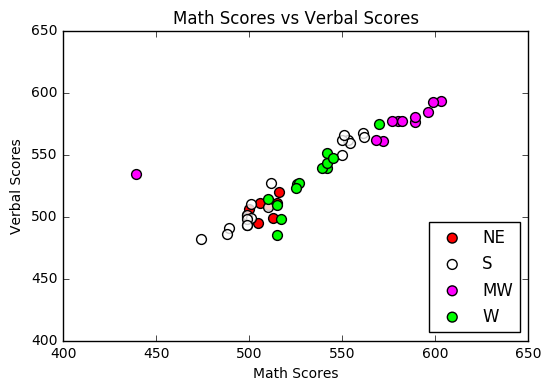

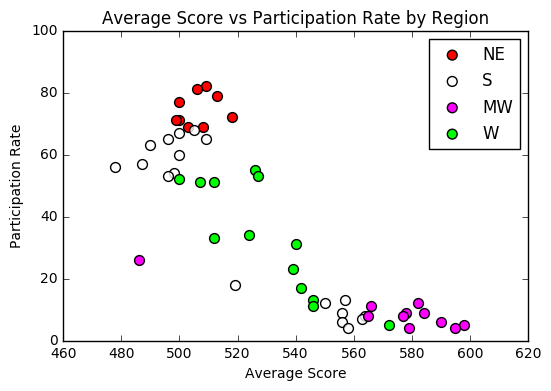

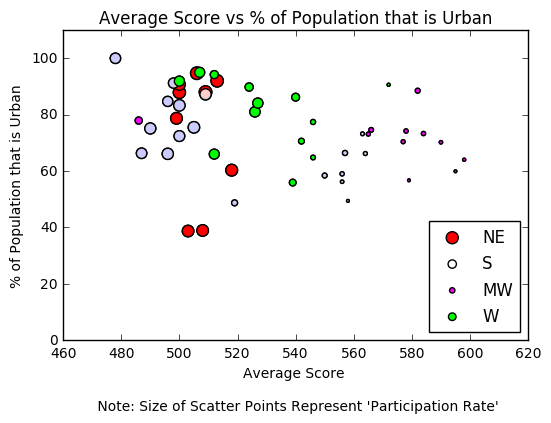

In [61]:
#Scatter Plots
plt.scatter(ne_3,ne_4,c=(1,0,0,1),s=50,label='NE')
plt.scatter(s_3,s_4,c=(1,1,1,0.8),s=50,label='S')
plt.scatter(mw_3,mw_4,c=(1,0,1,1),s=50,label='MW')
plt.scatter(w_3,w_4,c=(0,1,0,1),s=50,label='W')
plt.xlabel("Math Scores")
plt.ylabel("Verbal Scores")
plt.title("Math Scores vs Verbal Scores")
plt.axis([400,650,400,650])
plt.legend(loc='lower right',scatterpoints=1)
plt.show()

plt.scatter(ne_1,ne_2,c=(1,0,0,1),s=50,label='NE')
plt.scatter(s_1,s_2,c=(1,1,1,0.8),s=50,label='S')
plt.scatter(mw_1,mw_2,c=(1,0,1,1),s=50,label='MW')
plt.scatter(w_1,w_2,c=(0,1,0,1),s=50,label='W')
plt.ylim(0,100)
plt.legend(loc='upper right',scatterpoints=1,markerscale=1)
plt.title("Average Score vs Participation Rate by Region")
plt.xlabel("Average Score")
plt.ylabel("Participation Rate")
plt.show()

plt.scatter(tot,pop_urb,s=rate)
plt.scatter(ne_1,ne_6,c=(1,0,0,1),s=ne_2,label='NE')
plt.scatter(s_1,s_6,c=(1,1,1,0.8),s=s_2,label='S')
plt.scatter(mw_1,mw_6,c=(1,0,1,1),s=mw_2,label='MW')
plt.scatter(w_1,w_6,c=(0,1,0,1),s=w_2,label='W')
plt.xlabel("Average Score \n \n Note: Size of Scatter Points Represent 'Participation Rate'")
plt.ylabel("% of Population that is Urban")
plt.title("Average Score vs % of Population that is Urban")
plt.legend(loc='lower right',scatterpoints=1,markerscale=1)
plt.ylim(0,110)
plt.show()

My bar charts indicate that the SATs are common in the North Eastern U.S., and uncommon in the Mid Western U.S.


The average score by region indicates that those areas with lower participation rates score higher on the SATs.
This is to be expected especially when considering that schools in the Mid Western U.S. require ACT scores and not SAT scores. Thus, only serious students who seek to attend schools that require SAT scores will take the SAT.


As to why the SAT scores differ so much based upon participation rate:
It is a logical assumption that serious students test more strongly than unserious students.
As fewer unserious students take the test relative to serious students, it is to be expected that the average SAT score increases.
This hypothesis is proven by the afformentioned relation proven with the Mid West scenario, which indicates lower participation rate causes an increase in SAT scores. 

Thus, the data is too uncomparable due to the students who take the test by region, and data should be looked at on a state level, not a national level.

---

Note that for "x_5", I found the number of people who took the test per state by using the following formula: rate\*pop\*student_percentage

I obvioulsy did not know the percentage of people who were in valid test takers (a.k.a juniors and seniors in high school; student_percentage), but I assumed this figure did not change by state, so I ensured it was cancelled out by finding a ratio: 

(rate_i\*pop_i\*student_percentage)/(rate1\*pop1\*student_percentage+...rate5\*pop5\*student_percentage)

Which goes to:

(rate_i\*pop_i)/(rate1\*pop1+...rate5\*pop5)

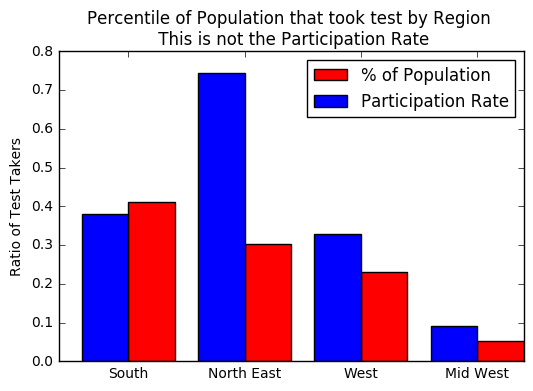

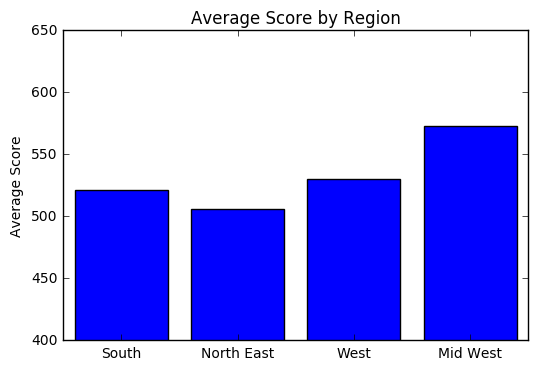

In [72]:
#Barchart
plt.bar([x-.4 for x in range(1,5)],[float(s_sum)/t,float(ne_sum)/t,float(w_sum)/t,float(mw_sum)/t],width=0.4,align='edge',color='r',label='% of Population')
plt.bar([x-.4 for x in range(1,5)],[s_mean1/100,ne_mean1/100,w_mean1/100,mw_mean1/100],width=-0.4,align='edge',label='Participation Rate')
plt.xticks([.6,1.6,2.6,3.6],("South","North East","West","Mid West"))
plt.ylabel("Ratio of Test Takers")
plt.title("Percentile of Population that took test by Region \n This is not the Participation Rate")
plt.legend(loc='upper right')
plt.show()

plt.bar([x-.4 for x in range(1,5)],[float(s_mean2),float(ne_mean2),float(w_mean2),float(mw_mean2)])
plt.xticks([1,2,3,4],("South","North East","West","Mid West"))
plt.ylabel("Average Score")
plt.title("Average Score by Region")
plt.ylim(400,650)
plt.show()

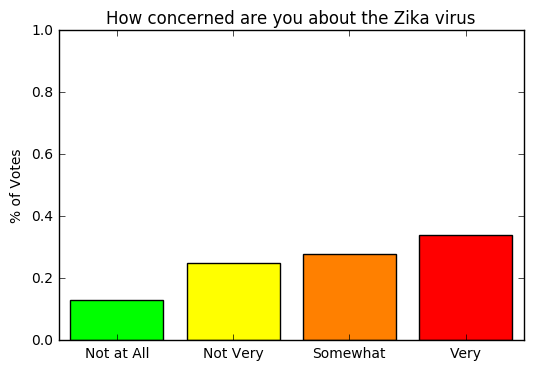

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline
t="How concerned are you about the Zika virus"
l=["Not at All","Not Very","Somewhat","Very"]
values=[.13,.25,.28,.34]
plt.bar([x-.4 for x in range(1,5)],values,color=([(0,1,0,1),(1,1,0,1),(1,.5,0,1),(1,0,0,1)]))
plt.xticks(range(1,5),l)
plt.ylabel("% of Votes")
plt.title(t)
plt.ylim(0,1)
plt.show()